In [17]:
from faceID import faceID
from emotion_detection import create_model, emotionID
from camera_to_image_array import camera_to_image_array as cam
from dataface_funcs import dataface_add
from getting_name_dataface import match_descriptor_in_dataface as lookup
from image_array_to_descriptors import load_dlib as load
from image_array_to_descriptors import match_image_to_descriptors as match
from image_array_to_descriptors import load_image_to_descriptors
from dataface_funcs import pickOpen, pickSave, dataface_remove

Add someone to the dataface

In [23]:
n = "Brandon" #enter name

In [24]:
def addFace():
    pic = cam()
    dataface = pickOpen()
    face_detect, face_rec_model, shape_predictor = load()
    name, descriptor = load_image_to_descriptors(face_detect, face_rec_model, shape_predictor, pic, n) 
    dataface_add(dataface, name, descriptor)
    pickSave(dataface)

In [25]:
addFace()

File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


Face rec

In [26]:
def faceRecOnly():
    pic = cam()
    dataface = pickOpen()
    face_detect, face_rec_model, shape_predictor = load()
    out, rect = match(face_detect, face_rec_model, shape_predictor, pic)
    names = lookup(dataface, out)
    ax = faceID(pic, rect, names)

File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


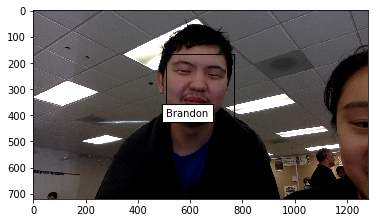

In [27]:
faceRecOnly()

Face rec with emotions

In [2]:
def faceRec():
    pic = cam()
    dataface = pickOpen()
    face_detect, face_rec_model, shape_predictor = load()
    out, rect = match(face_detect, face_rec_model, shape_predictor, pic)
    names = lookup(dataface, out)
    ax = faceID(pic, rect, names)
    emotion = emotionID(pic, ax, face_detect, shape_predictor, create_model())
    return emotion

In [3]:
def faceRec2(img_arr):
    """ Performs face and emotion recognition on an image 
    array, rather than on a picture taken from the camera.
        
        Parameters
        ----------
        img_arr : nd.array
            the image, as an array
        
        Returns
        -------
        The emotion. """    
    
    dataface = pickOpen()
    face_detect, face_rec_model, shape_predictor = load()
    out, rect = match(face_detect, face_rec_model, shape_predictor, img_arr)
    names = lookup(dataface, out)
    ax = faceID(img_arr, rect, names)
    emotion = emotionID(img_arr, ax, face_detect, shape_predictor, create_model())
    return emotion

File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


'happy'

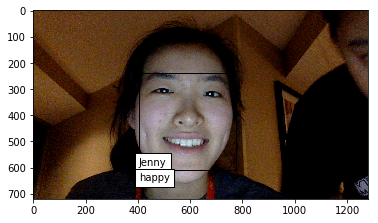

In [12]:
faceRec()

In [10]:
from camera import take_picture

x = take_picture()

File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/dlib_face_recognition_resnet_model_v1.dat
File already exists:
	/Users/christinaxiao/Christina/COLLEGE/Camps/MIT BWSI/Class/Week 2 - Visual/DlibModels/dlib_models/shape_predictor_68_face_landmarks.dat


'neutral'

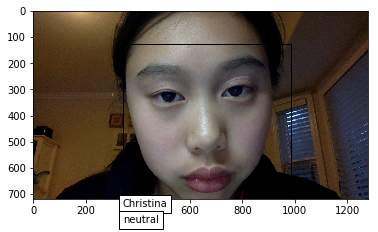

In [11]:
faceRec2(x)